# Exploratory Data Analysis

Using example data from [Kaggle](https://www.kaggle.com/cyaris/2016-mlb-season) about the 2016 MLB season, we will investigate the data using exploratory data analysis (EDA) and catalogue various EDA methods that can be used prior to performing data analysis or fitting a machine learning model. Exact methods used in a given project will vary based on the project goals.

The following variables, which represent a subset of the full dataset, will be used: <br>
- **game_type** — is the game during the day or at night<br>
- **day_of_week** — what day of the week did the game occur<br>
- **temperature** — average game temperature (Fahrenheit)<br>
- **sky** — description of sky condition at the time of the game<br>
- **total_runs** — total runs scored in the game<br>
- **attendance** - total game attendence

Through EDA, we will investigate:<br>
- Data types
- Missing data and how it is coded
- How discrete/categorical data is coded
- How the data are scaled
- Outliers
- Distributions of continuous features
- Relationships between pairs of features

## Import data and modules

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset downloaded from Kaggle (https://www.kaggle.com/cyaris/2016-mlb-season)
bb = pd.read_csv('baseball_reference_2016_clean.csv')

# select a subset of dataset
bb = bb[['game_type','day_of_week','temperature','sky','total_runs', 'attendance']]

## Preview the dataset

In [3]:
bb.head()

,game_type,day_of_week,temperature,sky,total_runs,attendance
0,Night Game,Sunday,74.0,Sunny,7,40030.0
1,Night Game,Wednesday,55.0,Overcast,5,21621.0
2,Night Game,Wednesday,48.0,Unknown,6,12622.0
3,Night Game,Wednesday,65.0,Cloudy,4,18531.0
4,Day Game,Wednesday,77.0,In Dome,7,18572.0


In [4]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_type    2463 non-null   object 
 1   day_of_week  2463 non-null   object 
 2   temperature  2463 non-null   float64
 3   sky          2463 non-null   object 
 4   total_runs   2463 non-null   int64  
 5   attendance   2460 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 115.6+ KB


In [5]:
bb.describe()

,temperature,total_runs,attendance
count,2463.000000,2463.000000,2460.000000
mean,73.818920,8.933415,30370.703659
std,10.583106,4.480352,9875.466703
min,31.000000,1.000000,8766.000000
25%,67.000000,6.000000,22432.000000
50%,74.000000,8.000000,30604.500000
75%,81.000000,12.000000,38396.250000
max,101.000000,29.000000,54449.000000


## Remove Duplicates

In [6]:
bb = bb.drop_duplicates()

In [7]:
bb.info()

# no records were dropped, so there are no duplicate records in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2463 entries, 0 to 2462
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_type    2463 non-null   object 
 1   day_of_week  2463 non-null   object 
 2   temperature  2463 non-null   float64
 3   sky          2463 non-null   object 
 4   total_runs   2463 non-null   int64  
 5   attendance   2460 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 134.7+ KB


## Data types

- **Categorical**
    - Ordinal categorical variables: categories mantain an order
         - dtype = string *or* int
    - Nominal categorical variables: categories with no order
         - dtype = string
    - Binary categorical variables: nominal variables with two categories
         - dtype = bool *or* int *or* str
- **Quantitative**
    - Discrete: numbered values that can only take certain values
         - dtype = int
    - Continuous: numbered values that are measured, and can be any number within a particular range
         - dtype = float

In [8]:
bb.dtypes

game_type       object
day_of_week     object
temperature    float64
sky             object
total_runs       int64
attendance     float64
dtype: object

If variables that are expected to be floats or ints are objects, this indicates that there is at least one character in the columns which are preventing the variable from being read as a numeric data type. This could be either an input mistake (such as the letter “o” in place of a “0”), or it can be an indication of how missing data were handled.

In [9]:
# sample code to change data type
bb['game_type'] = bb['game_type'].astype('object')

## Missing data

Depending on the analysis being performed, observations with missing values will either:
- remain as-is
- be removed
- be replaced with an imputed value
- be replaced with missing data type that Python can recognize, such as NaN.

Inspect variables to ensure that zero values are supposed to be zeros. It's possible that some zero values are supposed to be NaN, and could skew the analysis if they remain as zeros.

In [10]:
# can inspect quantitative variables to see if there are any unusual values using .unique()
bb['temperature'].unique()

array([ 74.,  55.,  48.,  65.,  77.,  81.,  72.,  70.,  40.,  36.,  64.,
        57.,  66.,  63.,  42.,  73.,  56.,  75.,  45.,  68.,  69.,  80.,
        67.,  78.,  58.,  82.,  59.,  50.,  61.,  76.,  51.,  71.,  44.,
        49.,  84.,  60.,  53.,  62.,  54.,  83.,  85.,  79.,  87.,  89.,
        90.,  93.,  95.,  97.,  88.,  86.,  91.,  94.,  92.,  43.,  96.,
        99.,  98., 100.,  52., 101.,  47.,  41.,  31.,  38.,  32.,  39.,
        34.])

In [11]:
# sample code to replace non number values
non_numbers = ['N','-','X']

for x in non_numbers:
    bb = bb.replace(x,'NaN')

## Categorizing and binning data

### Categorical encoding

Categorical features with many levels are “expensive” to include in a regression model (we need to calculate a separate slope for each level). We may want to consider:
- deleting the records of data with only a few observation
- combining categories with few observations into larger categories of related variables

Categorical variables can be inspected using **.value_counts()**

In [12]:
bb['game_type'].value_counts(dropna=False)

Night Game    1664
Day Game       799
Name: game_type, dtype: int64

Some variables could be coded differently depending on the trends in the data and the goals for the analysis.

For example - the day_of_week variable could be coded as:
- if attendance increases approximately linearly throughout the week, day_of_week could be ordinal.
- if attendance goes up and down throughout the week, day_of_week could be nominal.
- if games on Friday-Sunday have higher attendance than other days of the week, day_of_week could be coded to only have two levels: weekend and weekday. 

The distribution of values within a categories can be inspected using boxplots.

Text(0.5, 1.0, 'Attendance by Day of Week')

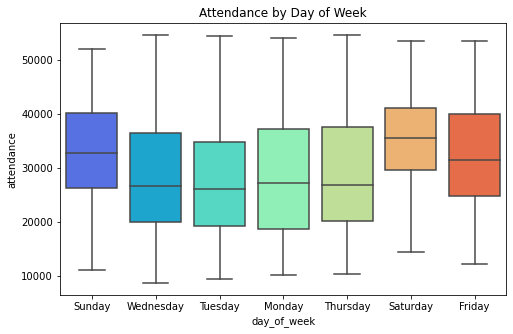

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week',y='attendance',data=bb, palette='rainbow')
plt.title("Attendance by Day of Week")

#### Encoding nominal categorical variables

The pandas **.Categorical()** method can be used to store data as type category and indicate the order of the categories.

In [14]:
# order ordinal categorical variables using pd.Categorical
bb['day_of_week'] = pd.Categorical(bb['day_of_week'], ['Monday', 
                                                       'Tuesday', 
                                                       'Wednesday', 
                                                       'Thursday',
                                                       'Friday',
                                                       'Saturday',
                                                       'Sunday'], ordered=True)

bb['day_of_week'].unique()

[Sunday, Wednesday, Tuesday, Monday, Thursday, Saturday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

#### Label encoding
Label encoding is when each category in a variable is converted to an integer. This enables us to perform numerical operations on the column and widen our range of plotting capabilities.

In [15]:
bb['day_of_week_codes'] = bb['day_of_week'].cat.codes

bb.head()

,game_type,day_of_week,temperature,sky,total_runs,attendance,day_of_week_codes
0,Night Game,Sunday,74.0,Sunny,7,40030.0,6
1,Night Game,Wednesday,55.0,Overcast,5,21621.0,2
2,Night Game,Wednesday,48.0,Unknown,6,12622.0,2
3,Night Game,Wednesday,65.0,Cloudy,4,18531.0,2
4,Day Game,Wednesday,77.0,In Dome,7,18572.0,2


#### One-hot encoding
One-hot encoding creates a new binary variable for each of the categories within our original variable. This technique is useful when managing nominal variables because it encodes the variable without creating an order among the categories.
- Use cases:
    - Nominal categorical variable where it doesn’t make sense to assign numbers to our categories, as this could create an order among the species that is not present (i.e dog breeds, eye color, country).
    - We don't want to assume equal spacing between categories in an ordinal categorical variable.

In [16]:
bb_sky_dummies = pd.get_dummies(data=bb, columns=['sky'])

bb_sky_dummies.head()

,game_type,day_of_week,temperature,total_runs,attendance,day_of_week_codes,sky_Cloudy,sky_Drizzle,sky_In Dome,sky_Night,sky_Overcast,sky_Rain,sky_Sunny,sky_Unknown
0,Night Game,Sunday,74.0,7,40030.0,6,0,0,0,0,0,0,1,0
1,Night Game,Wednesday,55.0,5,21621.0,2,0,0,0,0,1,0,0,0
2,Night Game,Wednesday,48.0,6,12622.0,2,0,0,0,0,0,0,0,1
3,Night Game,Wednesday,65.0,4,18531.0,2,1,0,0,0,0,0,0,0
4,Day Game,Wednesday,77.0,7,18572.0,2,0,0,1,0,0,0,0,0


In [17]:
bb['sky'].value_counts(dropna=False)

Cloudy      761
Sunny       745
Unknown     402
In Dome     356
Overcast    159
Drizzle      16
Night        12
Rain         12
Name: sky, dtype: int64

#### Combining Categories
Categories that are similar can be combined to show a larger, more general category. For example, the 'Drizzle' and 'Rain' in the 'Sky' column could be combined and shown as 'Precipitation'. <br> <br>
Categories with few observations can be combined and shown as 'other'. This is especially useful for creating more streamlined visualizations.

In [34]:
# combine categories based on a threshold value
# function adapted from https://milos.ai/2019/01/merging-categories-with-small-frequencies
counts = bb['sky'].value_counts(dropna=False)
threshold_value = 50
bb = bb.assign(sky_combined = np.where(bb['sky'].isin(counts[counts < threshold_value].index),'Other', bb['sky']))

bb[bb['sky'] == 'Drizzle']

,game_type,day_of_week,temperature,sky,total_runs,attendance,day_of_week_codes,sky_combined,sky_combined_pct
58,Day Game,Sunday,50.0,Drizzle,7,39077.0,6,Other,Other
63,Night Game,Sunday,49.0,Drizzle,15,34279.0,6,Other,Other
81,Night Game,Friday,62.0,Drizzle,8,34264.0,4,Other,Other
340,Night Game,Friday,56.0,Drizzle,9,33955.0,4,Other,Other
410,Night Game,Saturday,56.0,Drizzle,7,37396.0,5,Other,Other
414,Night Game,Friday,66.0,Drizzle,11,30857.0,4,Other,Other
439,Night Game,Wednesday,60.0,Drizzle,9,26934.0,2,Other,Other
527,Night Game,Tuesday,64.0,Drizzle,7,34319.0,1,Other,Other
925,Night Game,Thursday,74.0,Drizzle,10,24099.0,3,Other,Other
1403,Day Game,Monday,76.0,Drizzle,6,41850.0,0,Other,Other


In [33]:
# combine categories based on a threshold pct (i.e. the category appears in less than 10% of records)
# function pulled from https://milos.ai/2019/01/merging-categories-with-small-frequencies
threshold_percent = 10
series = pd.value_counts(bb['sky'])
mask = (series / series.sum() * 100).lt(threshold_percent)
bb = bb.assign(sky_combined_pct = np.where(bb['sky'].isin(series[mask].index),'Other', bb['sky']))

bb[bb['sky'] == 'Drizzle']

,game_type,day_of_week,temperature,sky,total_runs,attendance,day_of_week_codes,sky_combined,sky_combined_pct
58,Day Game,Sunday,50.0,Drizzle,7,39077.0,6,Other,Other
63,Night Game,Sunday,49.0,Drizzle,15,34279.0,6,Other,Other
81,Night Game,Friday,62.0,Drizzle,8,34264.0,4,Other,Other
340,Night Game,Friday,56.0,Drizzle,9,33955.0,4,Other,Other
410,Night Game,Saturday,56.0,Drizzle,7,37396.0,5,Other,Other
414,Night Game,Friday,66.0,Drizzle,11,30857.0,4,Other,Other
439,Night Game,Wednesday,60.0,Drizzle,9,26934.0,2,Other,Other
527,Night Game,Tuesday,64.0,Drizzle,7,34319.0,1,Other,Other
925,Night Game,Thursday,74.0,Drizzle,10,24099.0,3,Other,Other
1403,Day Game,Monday,76.0,Drizzle,6,41850.0,0,Other,Other


### Binning numeric data

Binning numeric data is arranging the data into categories based on a range of values. Binning data can be useful for creating more appealing visualizations, or improving a machine learning model.

In [19]:
# create bins for temperature variable
bins = [30, 40, 50, 60, 70, 80, 90, 100, 110]
bb['temp_binned'] = pd.cut(bb['temperature'], bins)

bb[['temp_binned', 'temperature']].head()

,temp_binned,temperature
0,"(70, 80]",74.0
1,"(50, 60]",55.0
2,"(40, 50]",48.0
3,"(60, 70]",65.0
4,"(70, 80]",77.0


## Scaling and normalization

For quantitative features, it is important to think about how each feature is scaled. Some features will be on vastly different scales than others just based on the nature of what the feature is measuring. <br>

When working with features with largely differing scales, it is often a good idea to standardize the features so that they all have a mean of 0 and a standard deviation of 1. The goal of normalization is to make every datapoint have the same scale so each feature is equally important. <br>

A feature without any values close to zero may also make it more difficult to estimate and interpret the intercept of a regression model. Standardizing or otherwise re-scaling the feature can fix this issue.

In [20]:
bb.describe()

# temperature and total_runs are on different scales because what they are measuring are different

,temperature,total_runs,attendance,day_of_week_codes
count,2463.000000,2463.000000,2460.000000,2463.000000
mean,73.818920,8.933415,30370.703659,3.161186
std,10.583106,4.480352,9875.466703,1.997867
min,31.000000,1.000000,8766.000000,0.000000
25%,67.000000,6.000000,22432.000000,1.000000
50%,74.000000,8.000000,30604.500000,3.000000
75%,81.000000,12.000000,38396.250000,5.000000
max,101.000000,29.000000,54449.000000,6.000000


### Data centering
#### Distance from mean
Subtract the mean of the variable from each data point so that the new mean is zero. This tells us how far above or below the mean each data point is.

#### Percent distance from mean
Divide each data point by the mean of the variable so that the new mean is one. This tells us each data point's percent distance from the mean (i.e. a centered value of 1.07 is 7% above the mean).

### Min - max normalization
For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1. Min-max normalization does not handle outliers very well because this method maintains the proportional distance between features from the origional scale.

Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.

### Z-Score normalization
If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number. The size of those negative and positive numbers is determined by the standard deviation of the original feature. If the unnormalized data had a large standard deviation, the normalized values will be closer to 0.

Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

## Outliers

In our EDA, it is important to check for outliers and skew in the data. One way to check for outliers is to use visualizations, including scatterplots and boxplots.

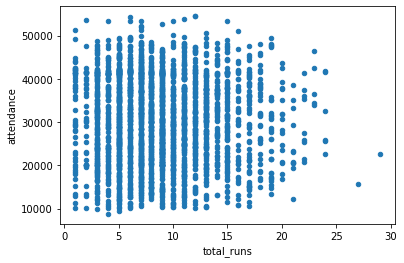

In [21]:
bb.plot.scatter(x = 'total_runs',y = 'attendance')

If there is an outlier, we may first want to verify that this value is correct, then we can decide whether or not to remove it.

*insert IQR outlier replacement formula*

### IQR replacement method
The IQR replacement method replaces all high outliers with the upper whisker value (Q3 + 1.5 * IQR) and all low outliers with the lower whisker value (Q1 - 1.5 * IQR)

In [22]:
# separate numerical fields from categorical
bb = bb.select_dtypes(include=['float64', 'int64'])

# replace outliers with upper whisker / lower whisker value
for column in bb:
    q1 = bb[column].quantile(0.25)
    q3 = bb[column].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = q3 + (iqr*1.5)
    lower_whisker = q1 - (iqr*1.5)
    bb.loc[bb[column] > upper_whisker, column] = upper_whisker
    bb.loc[bb[column] < lower_whisker, column] = lower_whisker

c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

## Distributions and associations

Prior to fitting a linear regression model, it can be important to inspect the distributions of quantitative features and investigate the relationships between features. We can visually inspect both of these by using a pair plot:

### Pairplots (scatterplots and histograms)

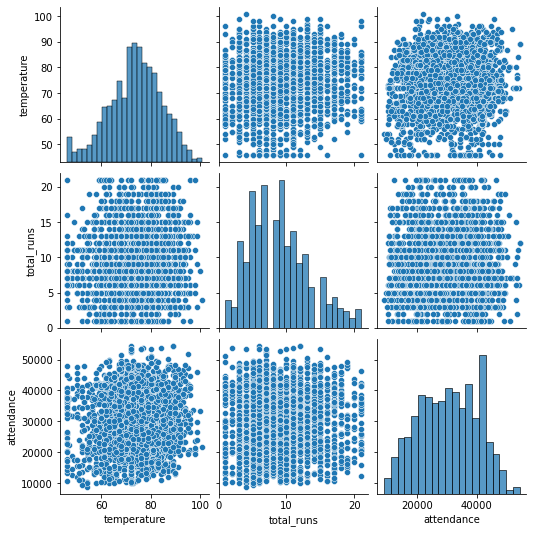

In [23]:
sns.pairplot(bb)

Looking at the histograms along the diagonal, total_runs appears to be somewhat right-skewed. This indicates that we may want to transform this feature to make it more normally distributed.<br>
*add further information about interpreting histograms*<br>

We can explore the relationships between pairs of features by looking at the scatterplots off of the diagonal. This is useful for a few different reasons. For example, if we see non-linear associations between any of the predictors and the outcome variable, that might lead us to test out polynomial terms in our model. We can also get a sense for which features are most highly related to our outcome variable and check for collinearity. In this example, there appears to be a slight positive linear association between temperature and the total number of runs. We can further investigate this using a heat map of the correlation matrix:

### Log Transformation

Generally, if skewness is less than -1 or greater than 1, the distribution is highly skewed. If we were to use skewed data in a machine learning model, the prediction model would be trained on a much larger number of lower values so it would have trouble predicting the results fir higher values, or the reverse.

In [38]:
# investigate skew of data
bb['total_runs'].skew()

# this data is not highly skewed, but we will apply a log transformation as an example

0.6794529830894894

c:\users\kspanos\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


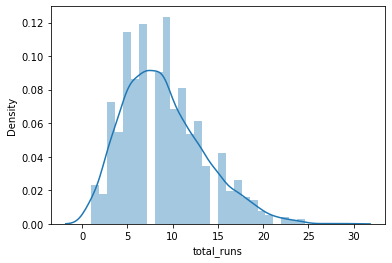

In [37]:
# visualize skew
sns.distplot(bb['total_runs'])

In [41]:
# apply log transformation
bb['log_total_runs'] = np.log(bb['total_runs'])

### Correlation matrix

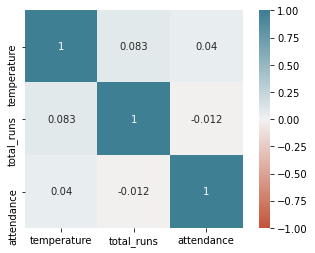

In [24]:
corr = bb.corr()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

Similar to linear regression, some classification models assume no multicollinearity in the data, meaning that two highly correlated predictors should not be included in the model. We can check this assumption by looking at a correlation heat map. On the other hand, features that are highly correlated with our outcome variable are especially important to include in the model.

## Additional items to add

- Principal component analysis (PCA)
- Other outlier methods
- Additional methods for transforming skewed data (cube root transformation, square transformation)